### U.S. Election Data Python EDA Project Part II:

This notebook was prepared as the second part of Erin Yu's U.S. Election Data Python EDA Project focusing on voter demographics. 

The summary table I used to create the plots below in this notebook comes from the 2016-2022 Validated Voter Demographics Table published by Pew Research Center on July 12, 2023. The research report and summary table can be accessed [here](https://www.pewresearch.org/politics/2023/07/12/republican-gains-in-2022-midterms-driven-mostly-by-turnout-advantage/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('2016-2022_Validated_Voter_Detailed_Tables.csv',
                 skiprows=range(4),
                 nrows=164,
                 usecols=[0,1,2,4,5,7,8,10,11])

df.columns = ['Group','2022 Dem', '2022 Rep', '2020 Dem', '2020 Rep',
             '2018 Dem', '2018 Rep', '2016 Dem', '2016 Rep']

df = df.replace('-','nan').fillna(0)

cols = ['2022 Dem', '2022 Rep', '2020 Dem', '2020 Rep',
        '2018 Dem', '2018 Rep', '2016 Dem', '2016 Rep']
df[cols] = df[cols].astype(float)

In [29]:
df[df['Group'] == 'Education (two-way)']

,Group,2022 Dem,2022 Rep,2020 Dem,2020 Rep,2018 Dem,2018 Rep,2016 Dem,2016 Rep
114,Education (two-way),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df

,Group,2022 Dem,2022 Rep,2020 Dem,2020 Rep,2018 Dem,2018 Rep,2016 Dem,2016 Rep
0,Gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Men,44.0,54.0,48.0,50.0,50.0,48.0,41.0,52.0
2,Women,51.0,48.0,55.0,44.0,58.0,40.0,54.0,39.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Race and ethnicity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
159,Gender and age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,"Men, 18-49",55.0,43.0,53.0,43.0,59.0,38.0,43.0,46.0
161,"Men, 50+",38.0,61.0,43.0,56.0,43.0,55.0,40.0,58.0
162,"Women, 18-49",58.0,41.0,60.0,38.0,67.0,31.0,63.0,27.0


[52.0, 48.0, 50.0, 54.0]
[41.0, 50.0, 48.0, 44.0]


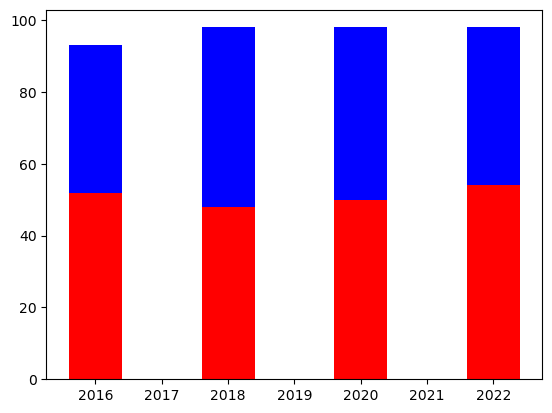

In [7]:
y_rep = list(df.iloc[1,8:0:-2])
y_dem = list(df.iloc[1,7:0:-2])
print(y_rep)
print(y_dem)
x = [2016,2018,2020,2022]

# plot bars in stack manner
plt.bar(x, y_rep, color='r')
plt.bar(x, y_dem, bottom=y_rep, color='b')
plt.show()

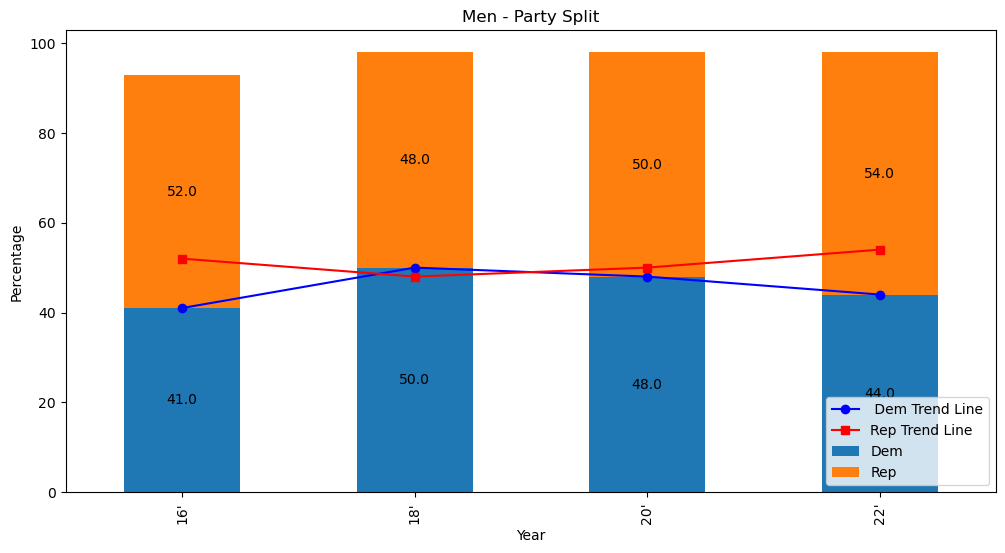

In [8]:
# plot Gender group men
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[1,7:0:-2])
y_rep = list(df.iloc[1,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_men = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_men.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_men.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_men['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_men['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Men - Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Men_bar.png')


plt.show()


In [9]:
df_men.rename(columns={'Dem': 'Dem_Men', 'Rep': 'Rep_Men'}, inplace=True)
df_men

,Dem_Men,Rep_Men
year,,
16',41.0,52.0
18',50.0,48.0
20',48.0,50.0
22',44.0,54.0


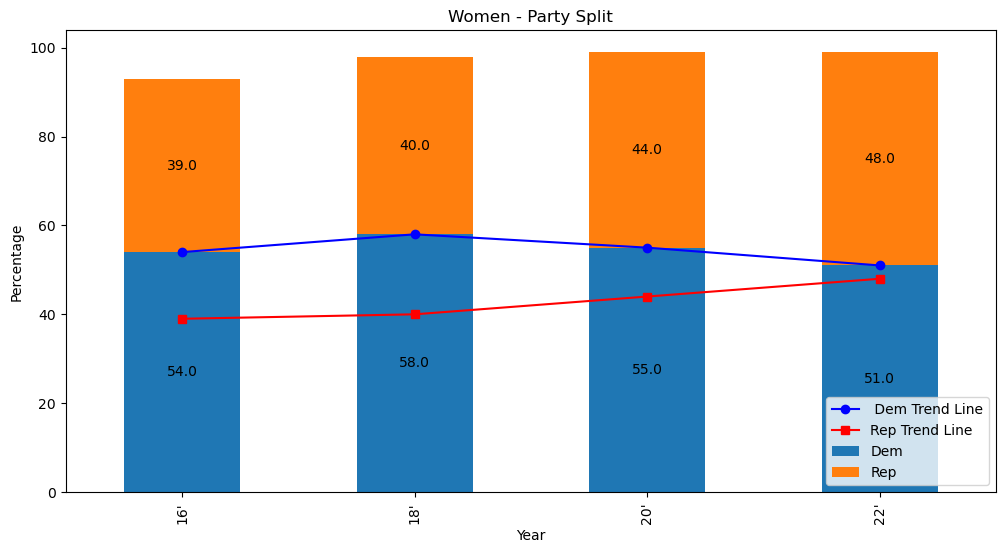

In [10]:
# plot Gender group women
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[2,7:0:-2])
y_rep = list(df.iloc[2,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_women = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_women.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_women.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_women['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_women['Rep'], color='red', marker='s', label='Rep Trend Line')


# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Women - Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Women_bar.png')

plt.show()


In [11]:
df_women.rename(columns={'Dem': 'Dem_Women', 'Rep': 'Rep_Women'}, inplace=True)

In [12]:
df_women

,Dem_Women,Rep_Women
year,,
16',54.0,39.0
18',58.0,40.0
20',55.0,44.0
22',51.0,48.0


In [13]:
pd.concat([df_men, df_women], axis = 1)

,Dem_Men,Rep_Men,Dem_Women,Rep_Women
year,,,,
16',41.0,52.0,54.0,39.0
18',50.0,48.0,58.0,40.0
20',48.0,50.0,55.0,44.0
22',44.0,54.0,51.0,48.0


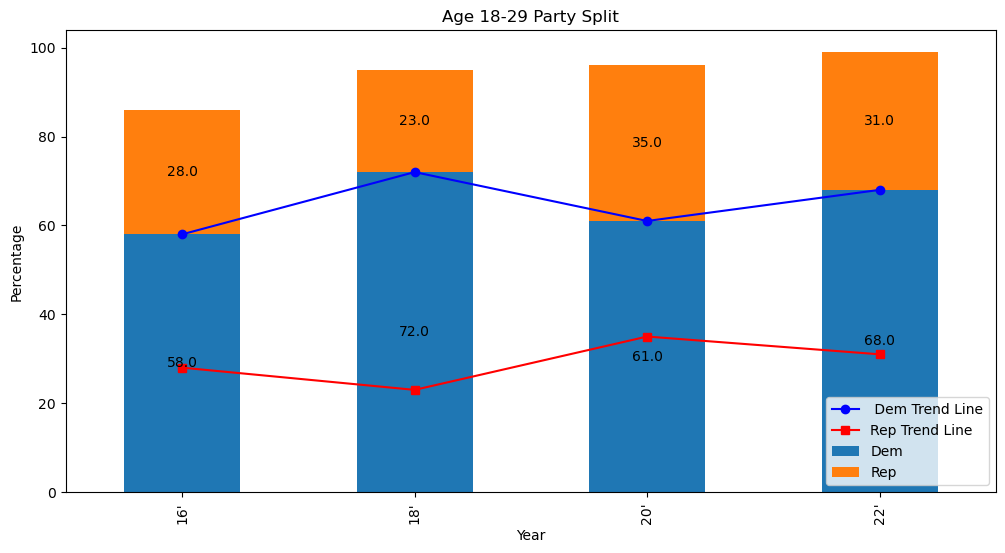

In [14]:
# plot age group 18-29
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[45,7:0:-2])
y_rep = list(df.iloc[45,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_age1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_age1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_age1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_age1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_age1['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Age 18-29 Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Age1_bar.png')

plt.show()

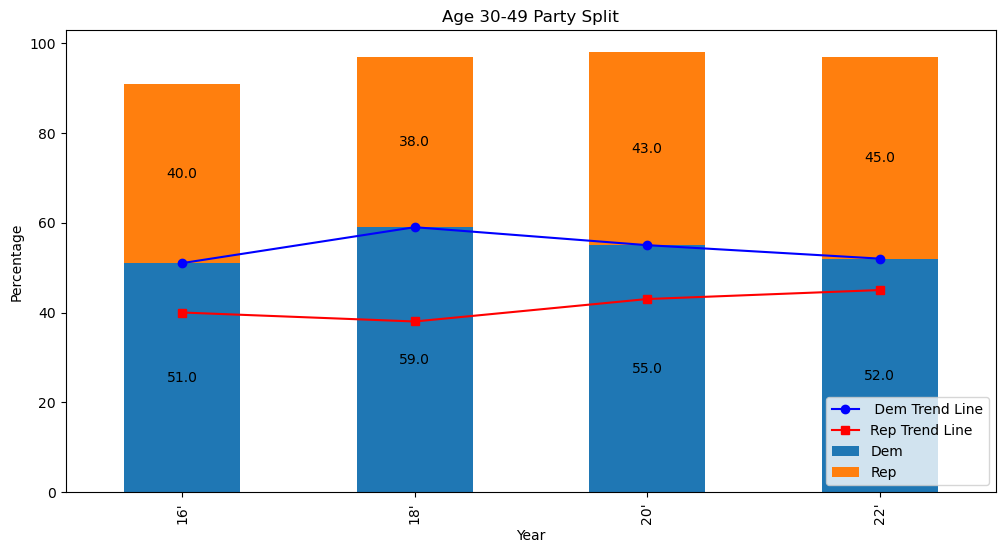

In [15]:
# plot age group 30-49
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[46,7:0:-2])
y_rep = list(df.iloc[46,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_age2 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_age2.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_age2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_age2['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_age2['Rep'], color='red', marker='s', label='Rep Trend Line')


# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Age 30-49 Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Age2_bar.png')

plt.show()

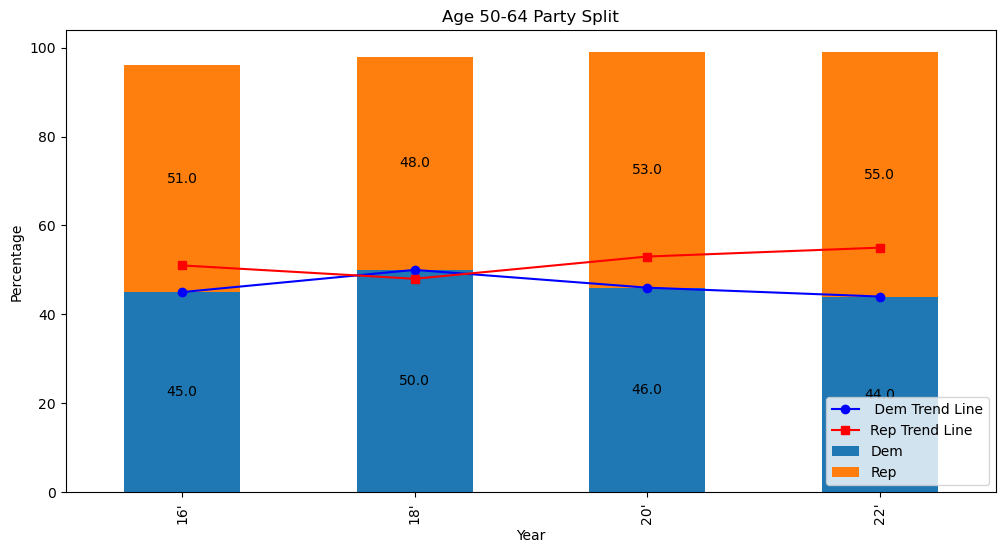

In [16]:
# plot age group 50-64
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[47,7:0:-2])
y_rep = list(df.iloc[47,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_age3 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_age3.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_age3.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_age3['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_age3['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Age 50-64 Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Age3_bar.png')

plt.show()

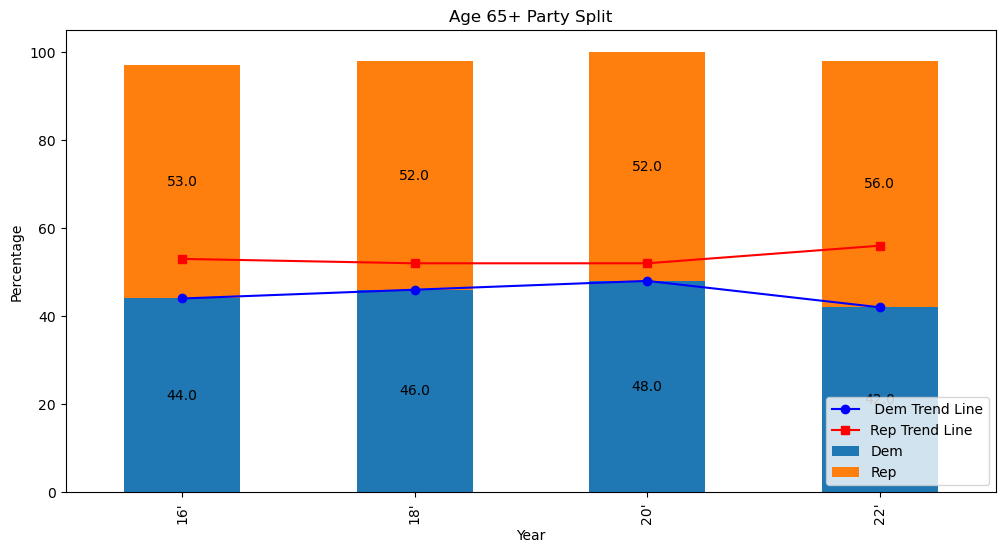

In [17]:
# plot age group 65+
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[48,7:0:-2])
y_rep = list(df.iloc[48,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_age4 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_age4.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_age4.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_age4['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_age4['Rep'], color='red', marker='s', label='Rep Trend Line')




# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Age 65+ Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Age4_bar.png')

plt.show()

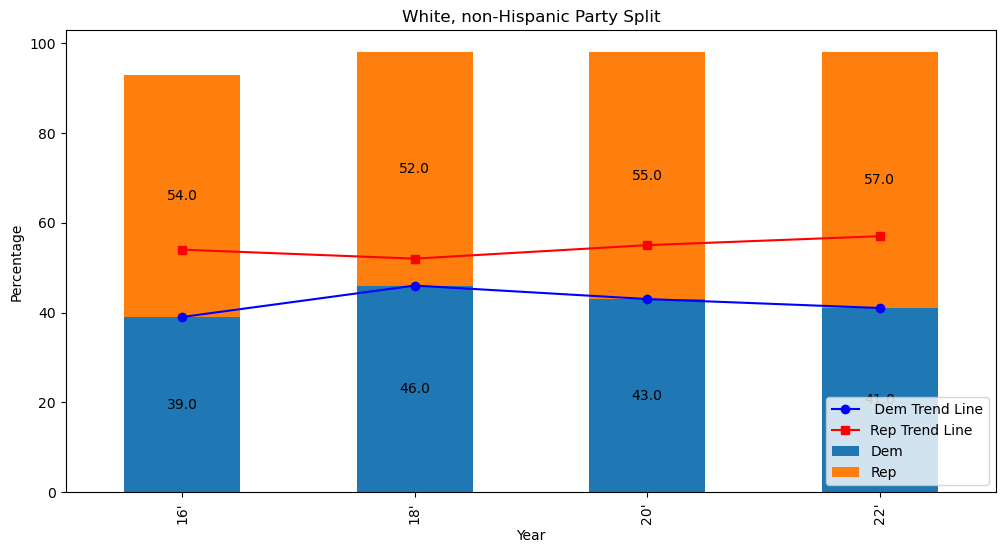

In [18]:
# plot Race and ethnicity group
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[5,7:0:-2])
y_rep = list(df.iloc[5,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_1['Rep'], color='red', marker='s', label='Rep Trend Line')



# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('White, non-Hispanic Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race1_bar.png')

plt.show()

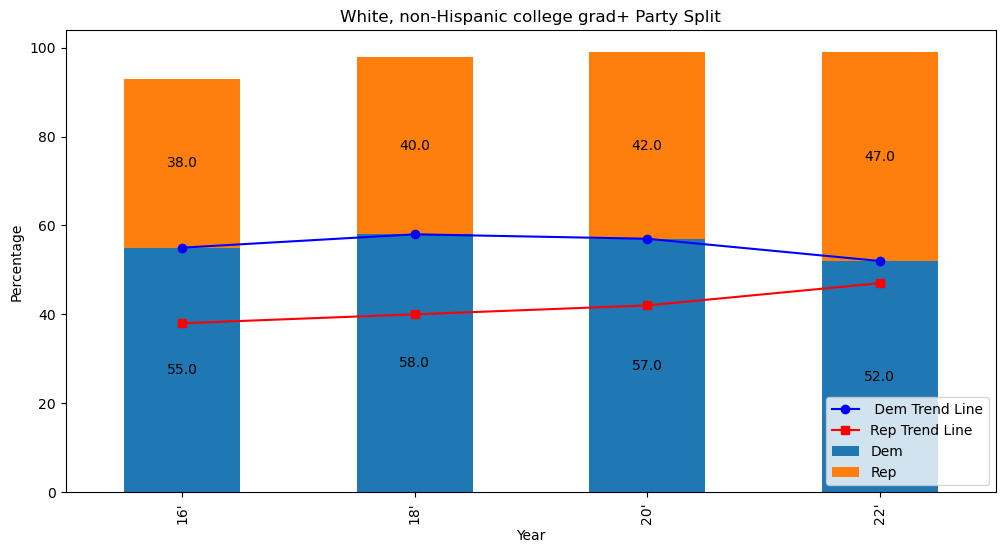

In [19]:
# plot Race and education
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[119,7:0:-2])
y_rep = list(df.iloc[119,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_e_1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_e_1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_e_1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_e_1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_e_1['Rep'], color='red', marker='s', label='Rep Trend Line')


# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('White, non-Hispanic college grad+ Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race_Edu1_bar.png')

plt.show()

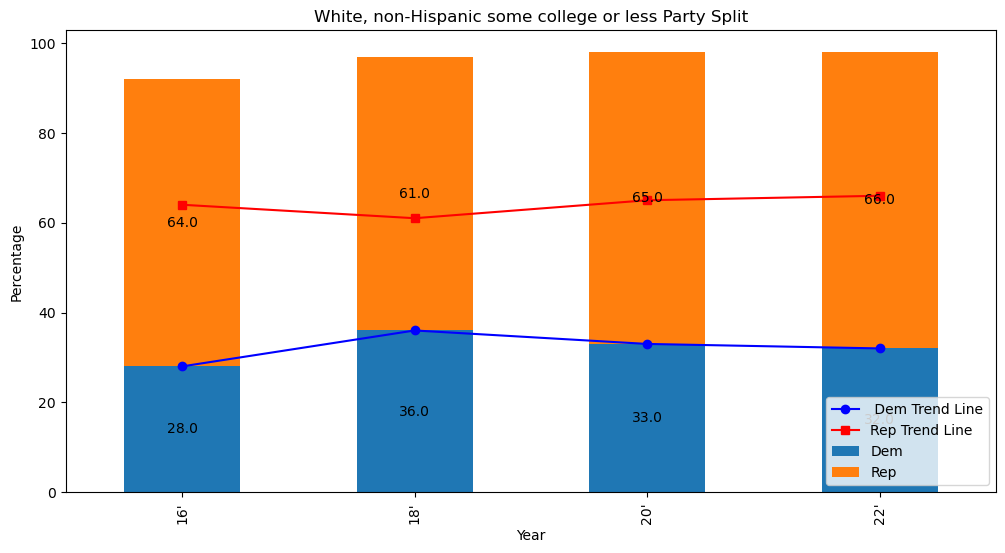

In [20]:
# plot Race and education
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[120,7:0:-2])
y_rep = list(df.iloc[120,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_e_2 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_e_2.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_e_2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_e_2['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_e_2['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('White, non-Hispanic some college or less Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race_Edu2_bar.png')

plt.show()

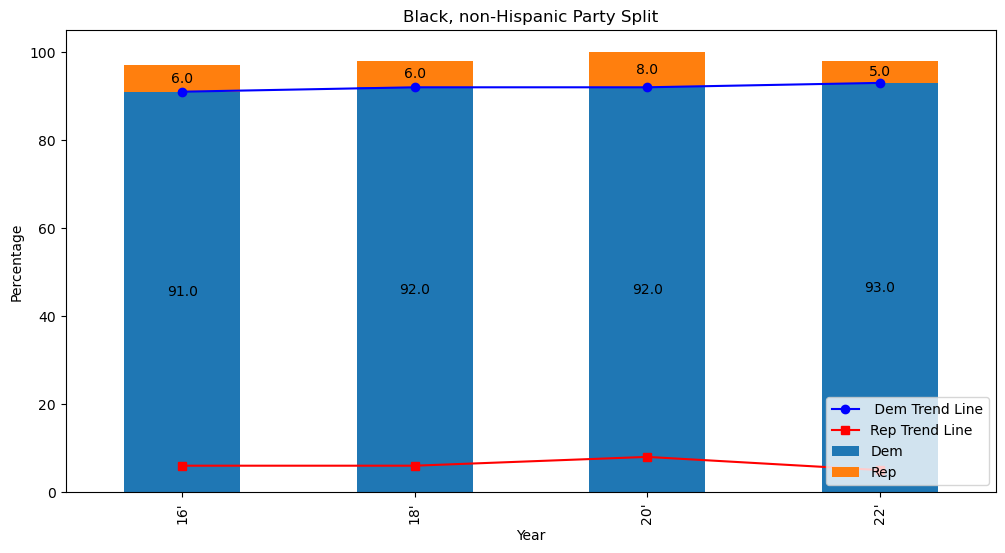

In [21]:
# plot Race and ethnicity group
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[6,7:0:-2])
y_rep = list(df.iloc[6,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_2 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_2.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_2['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_2['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Black, non-Hispanic Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race2_bar.png')

plt.show()

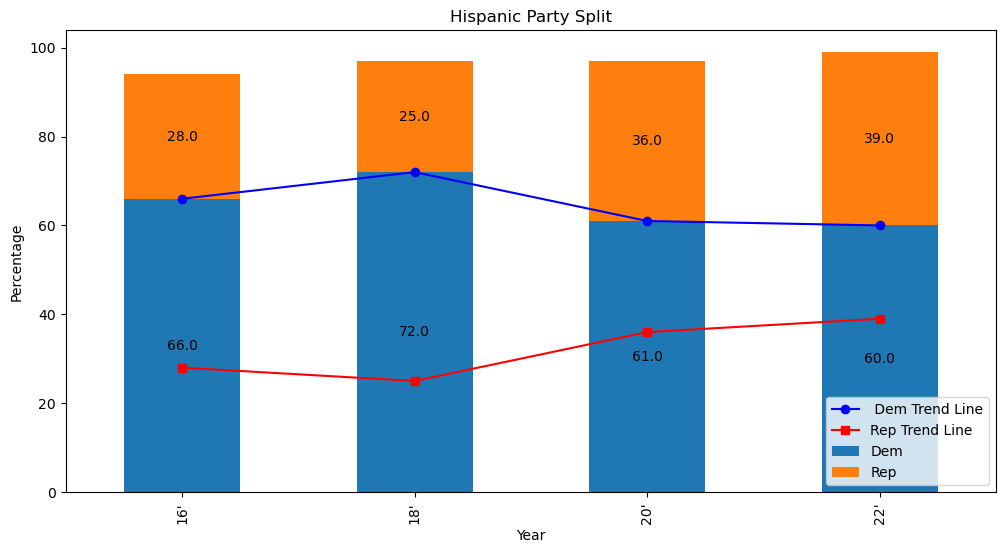

In [22]:
# plot Race and ethnicity group
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[7,7:0:-2])
y_rep = list(df.iloc[7,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_3 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_3.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_3.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_3['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_3['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Hispanic Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race3_bar.png')

plt.show()

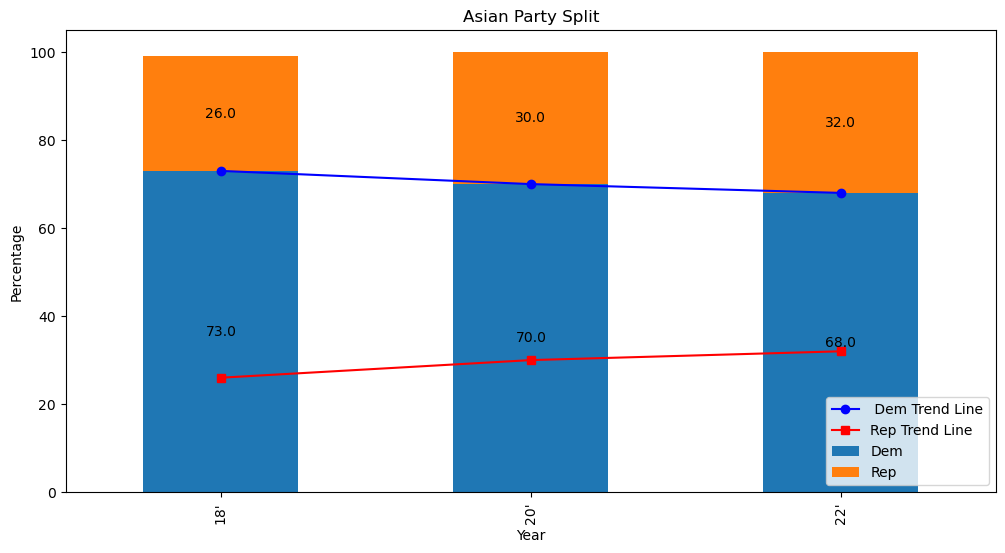

In [23]:
# plot Race and ethnicity group
x = ['18\'','20\'','22\'']
y_dem = list(df.iloc[8,5:0:-2])
y_rep = list(df.iloc[8,6:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_r_4 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_r_4.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_r_4.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_r_4['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_r_4['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Asian Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Race4_bar.png')

plt.show()

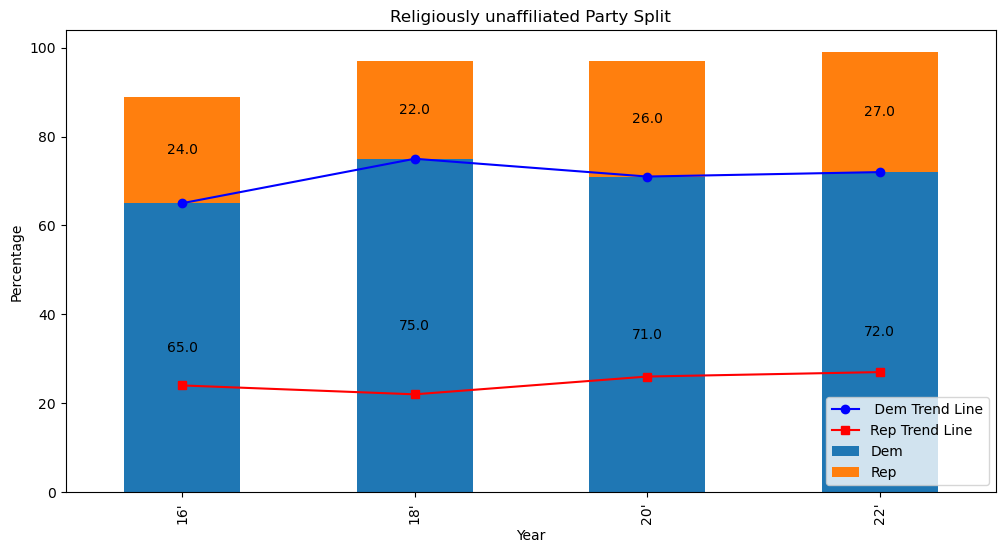

In [24]:
# plot religious affiliation
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[89,7:0:-2])
y_rep = list(df.iloc[89,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_re_1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_re_1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_re_1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_re_1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_re_1['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Religiously unaffiliated Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Religion_bar.png')

plt.show()

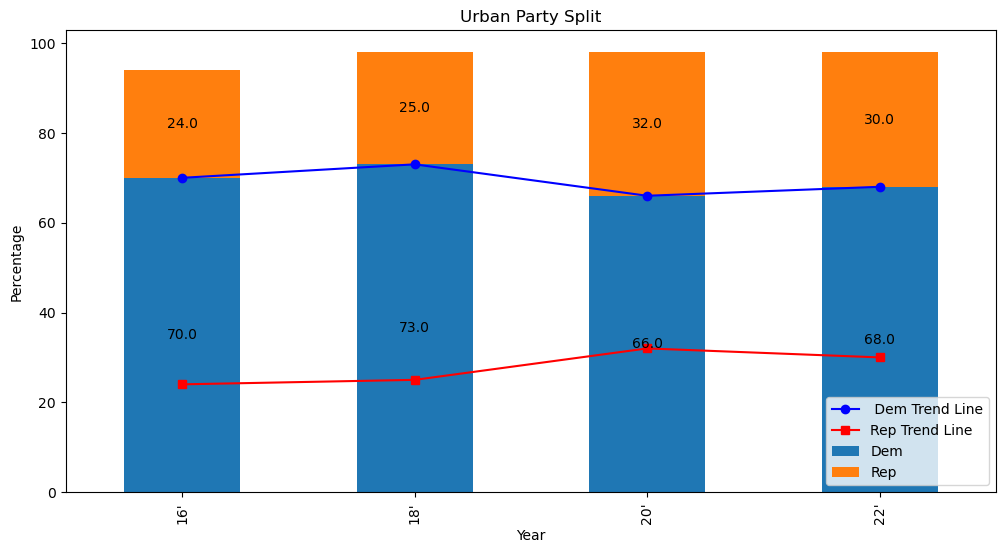

In [25]:
# plot community type
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[69,7:0:-2])
y_rep = list(df.iloc[69,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_com_1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_com_1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_com_1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_com_1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_com_1['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Urban Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Location1_bar.png')

plt.show()

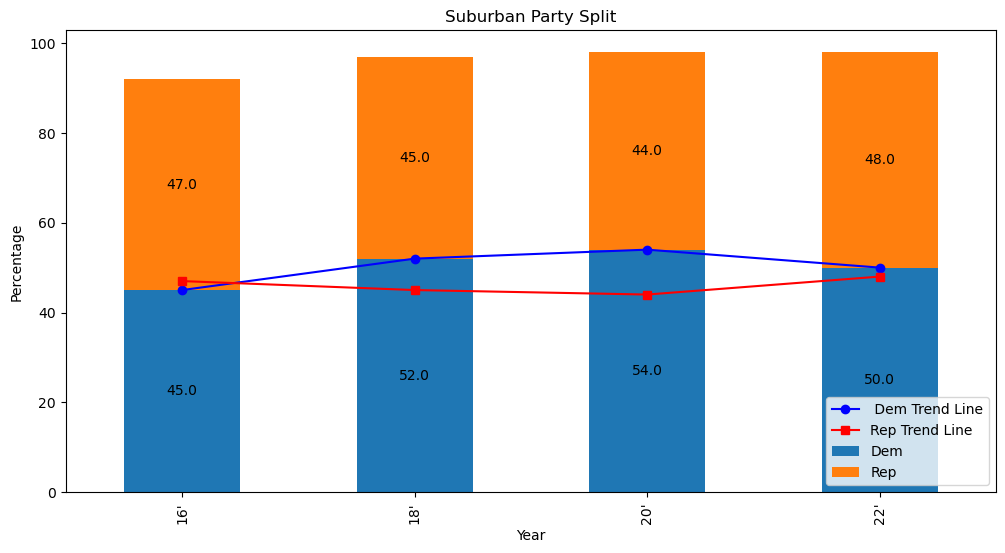

In [26]:
# plot community type
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[70,7:0:-2])
y_rep = list(df.iloc[70,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_com_2 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_com_2.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_com_2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_com_2['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_com_2['Rep'], color='red', marker='s', label='Rep Trend Line')


# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Suburban Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Location2_bar.png')

plt.show()

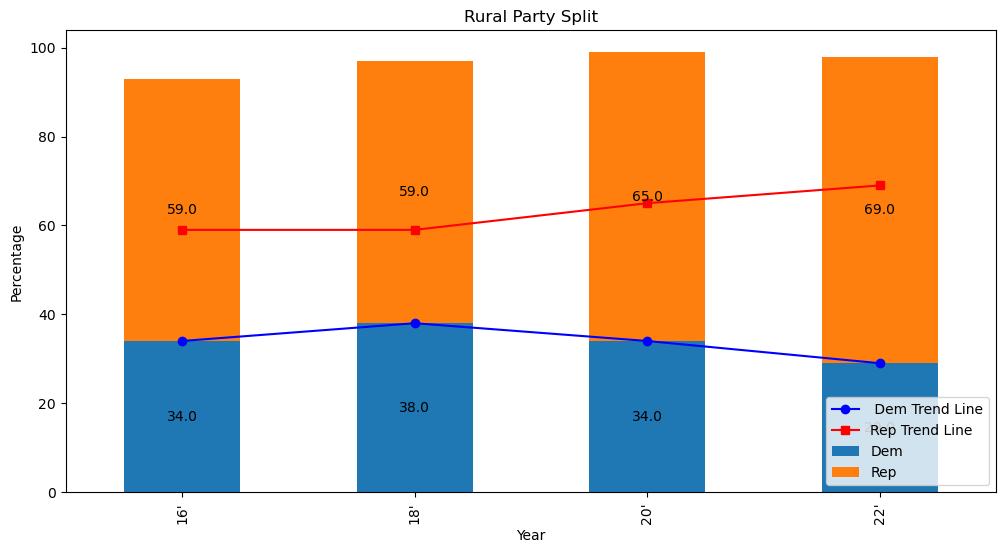

In [27]:
# plot community type
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[71,7:0:-2])
y_rep = list(df.iloc[71,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_com_3 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_com_3.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_com_3.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_com_3['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_com_3['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Rural Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

#plt.savefig('Location3_bar.png')

plt.show()

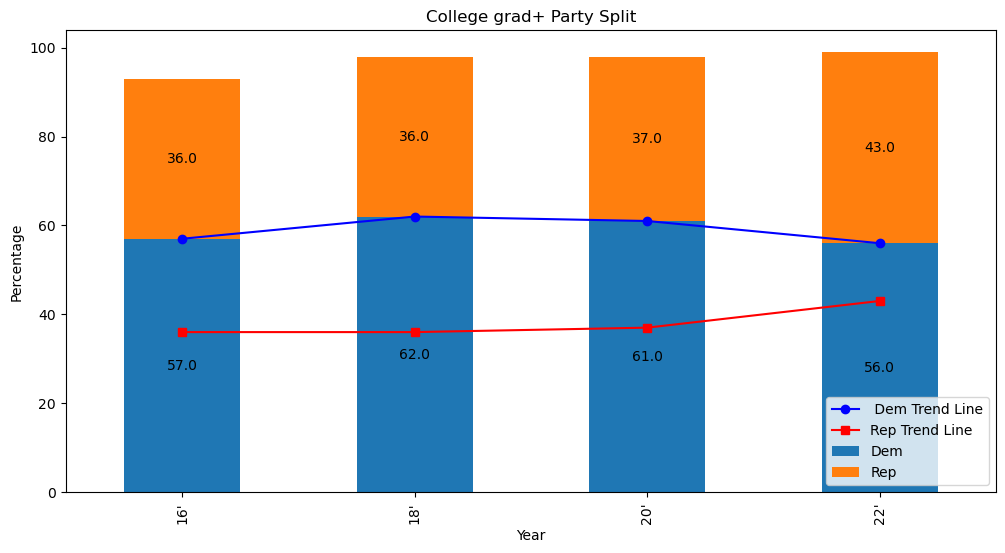

In [39]:
# plot education type
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[115,7:0:-2])
y_rep = list(df.iloc[115,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_edu_1 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_edu_1.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_edu_1.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_edu_1['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_edu_1['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('College grad+ Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

plt.savefig('/Users/erinyu/Desktop/edu1_bar.png')

plt.show()

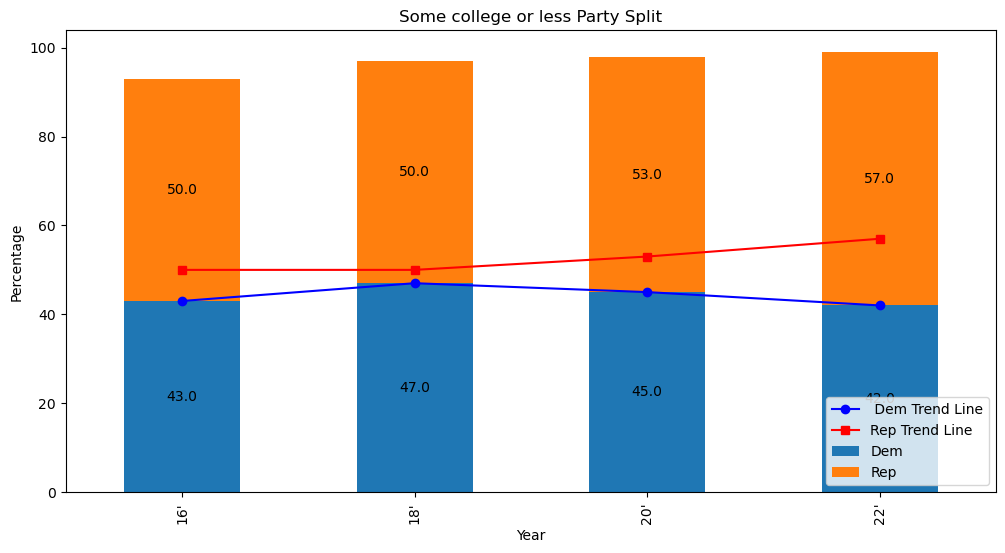

In [40]:
# plot education type
x = ['16\'','18\'','20\'','22\'']
y_dem = list(df.iloc[116,7:0:-2])
y_rep = list(df.iloc[116,8:0:-2])


data = {
    'year': x,
    'Dem': y_dem,
    'Rep': y_rep
}

df_edu_2 = pd.DataFrame(data)
components = ['Dem', 'Rep']
df_edu_2.set_index('year', inplace=True)

# Create the stacked bar chart
ax = df_edu_2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add trend lines for Value_1 and Value_2 individually
ax.plot(df_edu_2['Dem'], color='blue', marker='o', label=' Dem Trend Line')
ax.plot(df_edu_2['Rep'], color='red', marker='s', label='Rep Trend Line')

# Add data labels to the bars
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

plt.title('Some college or less Party Split')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

plt.savefig('/Users/erinyu/Desktop/edu2_bar.png')

plt.show()